#### Homework4
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. You are not allowed to use ChatGPT to answer any of the questions. 

Q1- (10 points) Why Bagged-decision trees and Random Forests are considered "ensemble learning" techniques? Compare these models and fully explain their differences and points they have in common.
---


https://sebastianraschka.com/faq/docs/bagging-boosting-rf.html


Bagged-decision trees and Random Forests are ensemble learning techniques because both involve building multiple individual decision trees, then combining their outputs for better prediction performance. 

In bagging, a number (ensemble) of decision trees are trained from random samples of our training set with replacement (bootstrap sampling). After those m decision trees are trained, they are used to classify new data via "majority rule". Typically, this results in a less complex decision boundary, as the bagging classifier would have less variance (overfitting) than a single decision tree. 

Meanwhile, in random forest, we also draw random bootstrap samples from the training set. However, random subsets of features are also taken to train the individual trees. The random feature selection means that the trees are more independent of each other as compared to regular bagging, often leading to faster and better predictive performance (less features to train on, better bias-variance trade-offs). 

Q2- (40 points) Complete these questions:
---

(30 points) Use the weather dataset provided in the lecture slides, and construct the decision tree until the leaf nodes are homogeneous in terms of the class label "Played". Use Information Gain as your criterion. Pro  vide the computations for calculating the Information Gain during the Greedy search method and mathematically justify why a feature is selected at each decision node.
---

For the root node, calculate the entropy of the dataset with respect to the "played" class. 
$$
E(P) = -\frac{10}{14}*log_2(\frac{10}{14}) - \frac{4}{14}*log_2(\frac{4}{14}) = 0.863  bits
$$
Then, we calculate the attribute returning the highest information gain. I will handwrite this and include the image in the submission. 
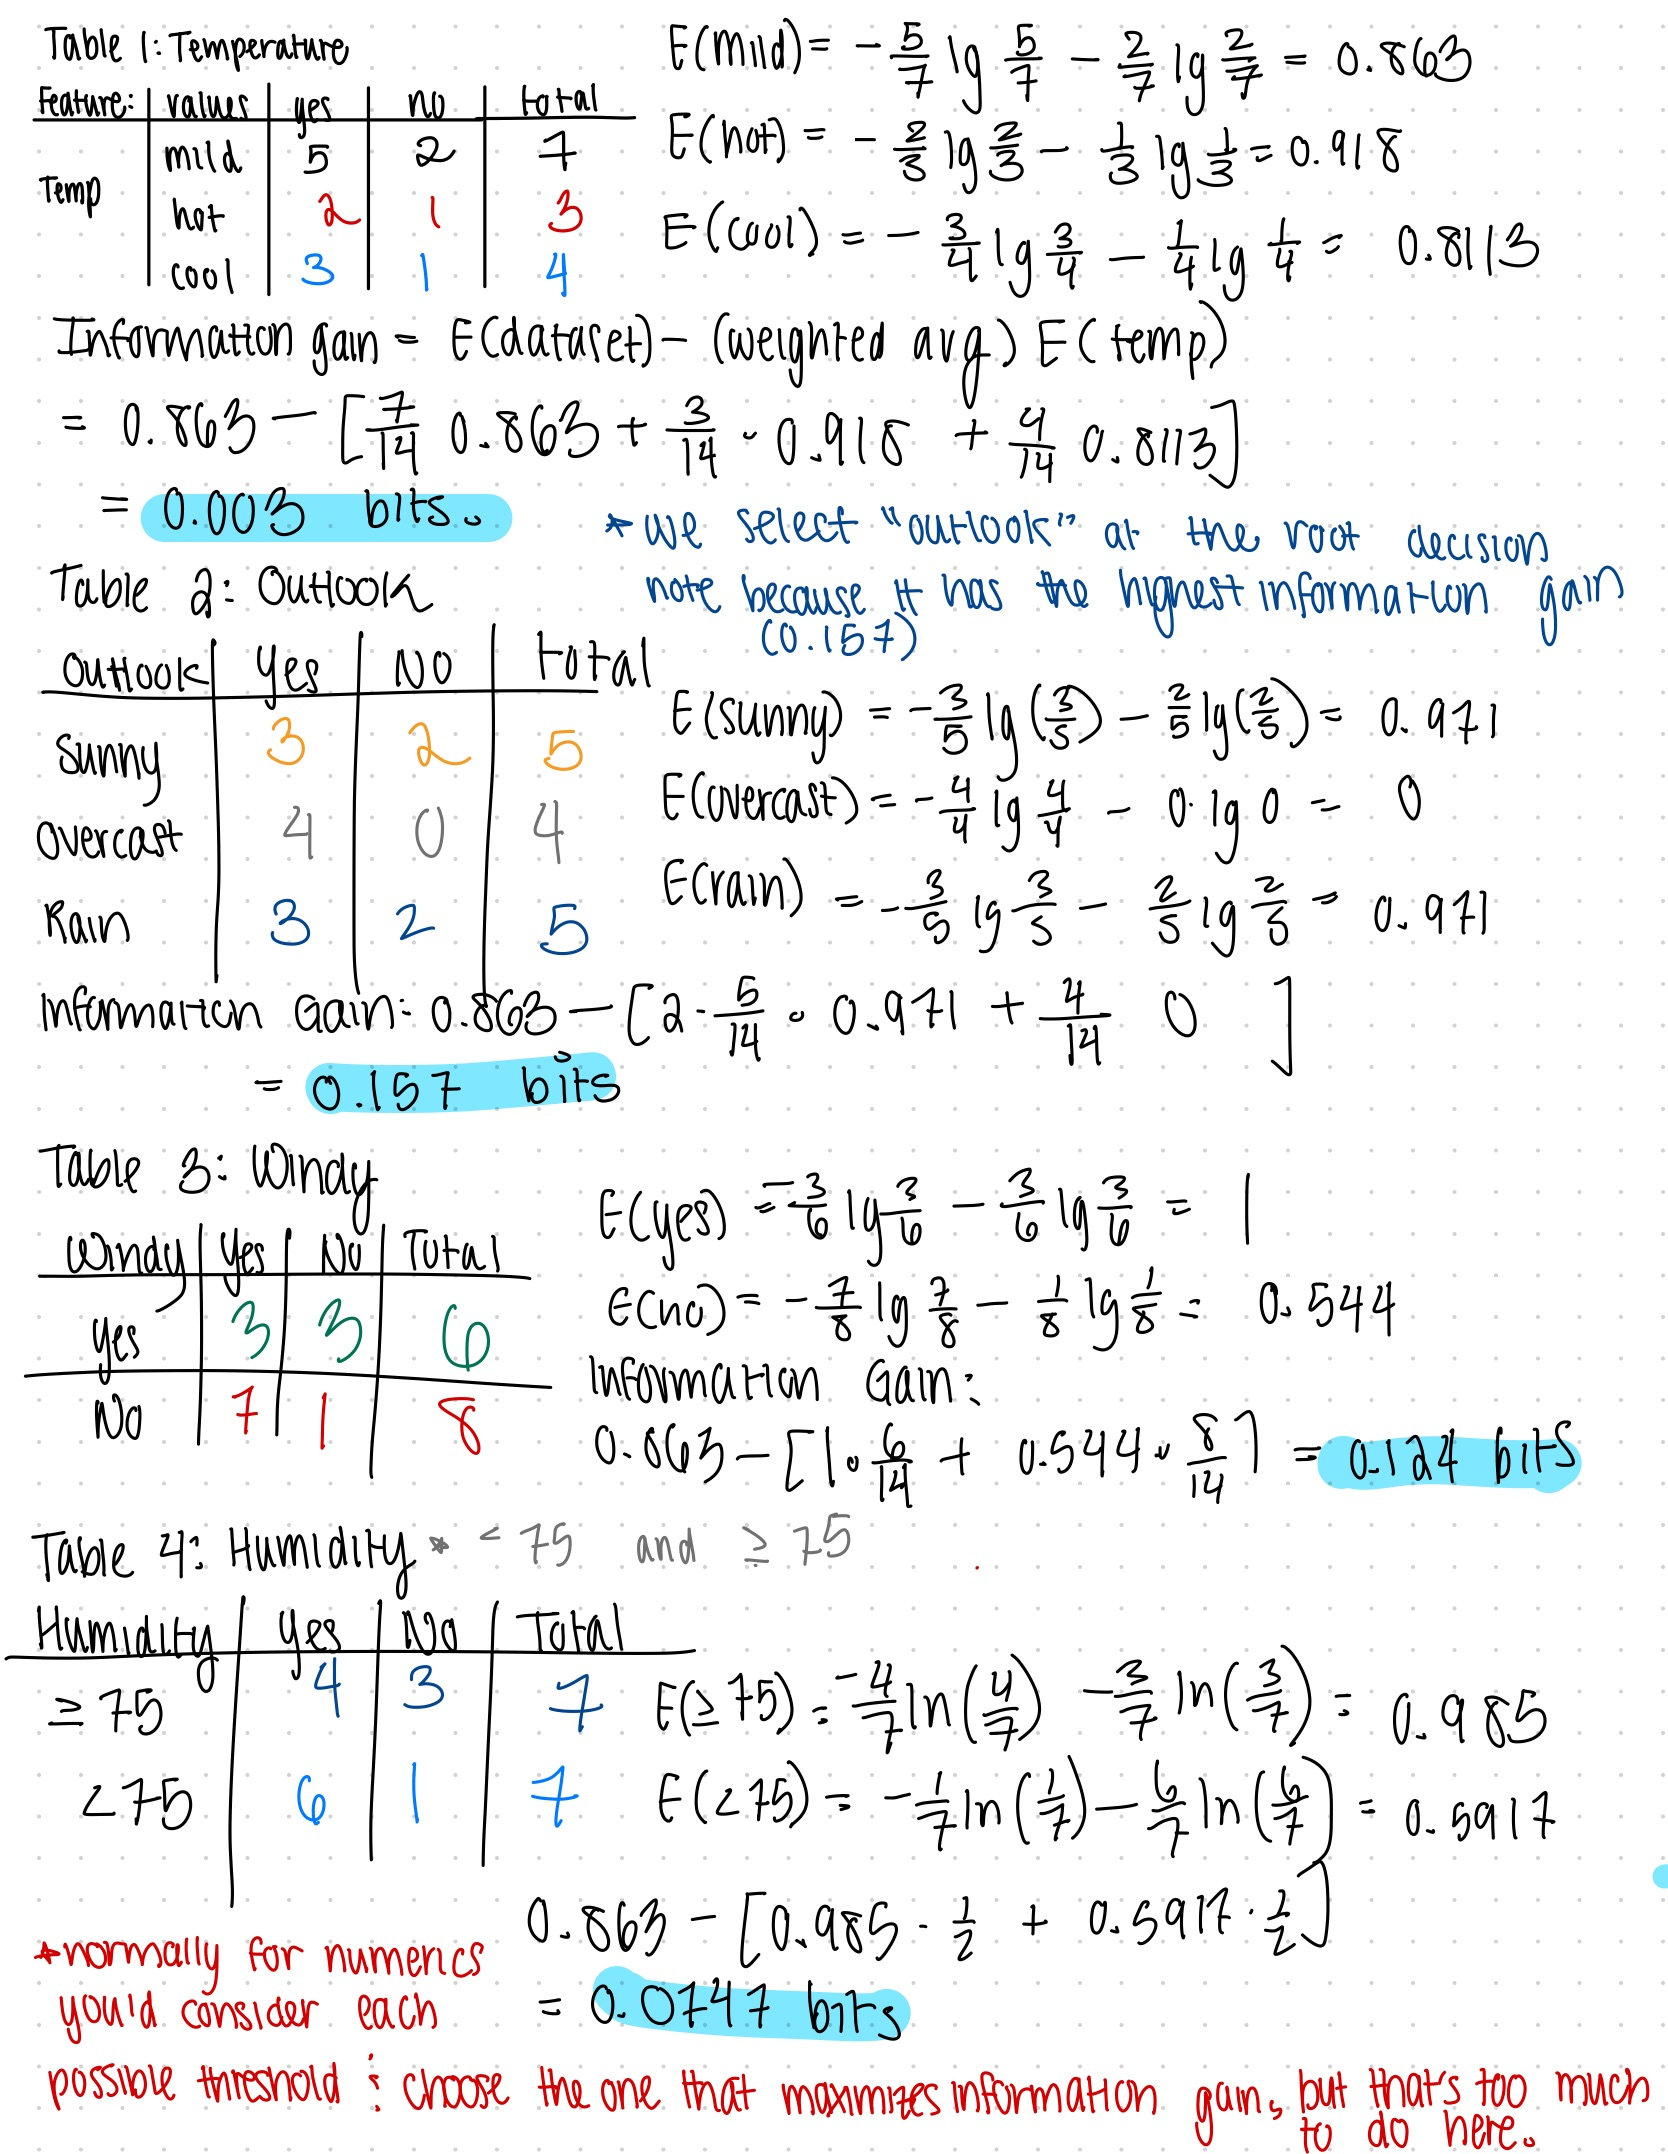
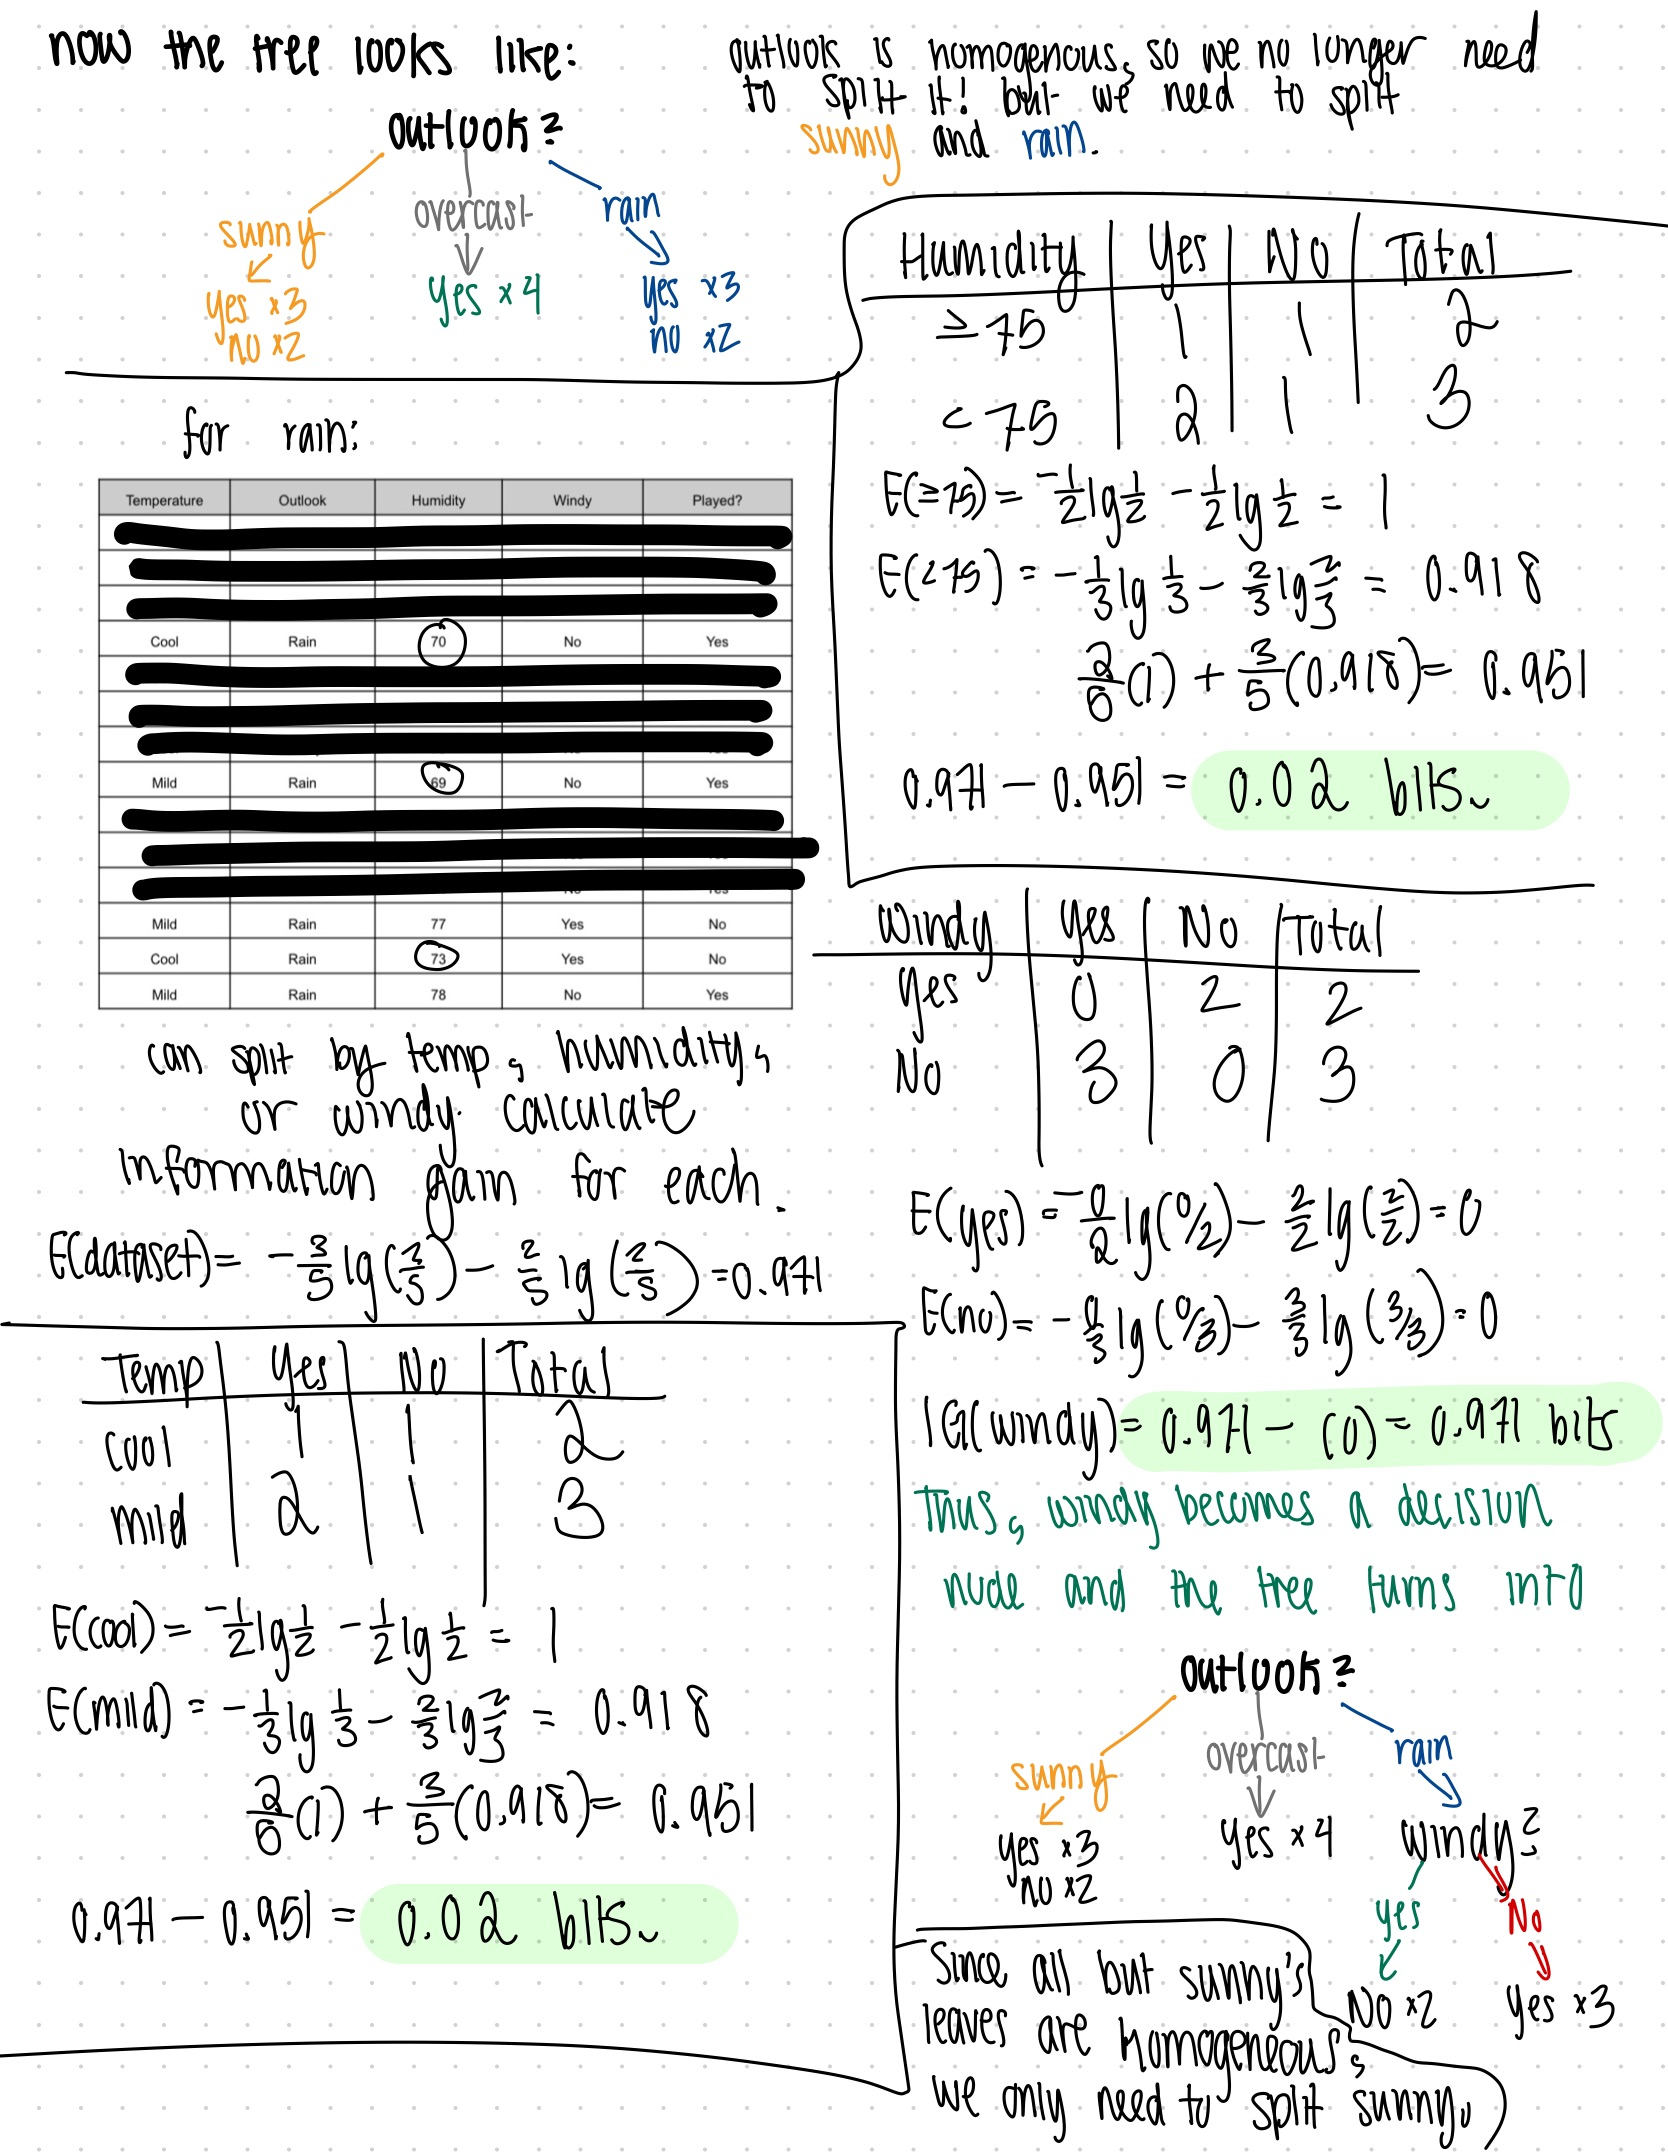
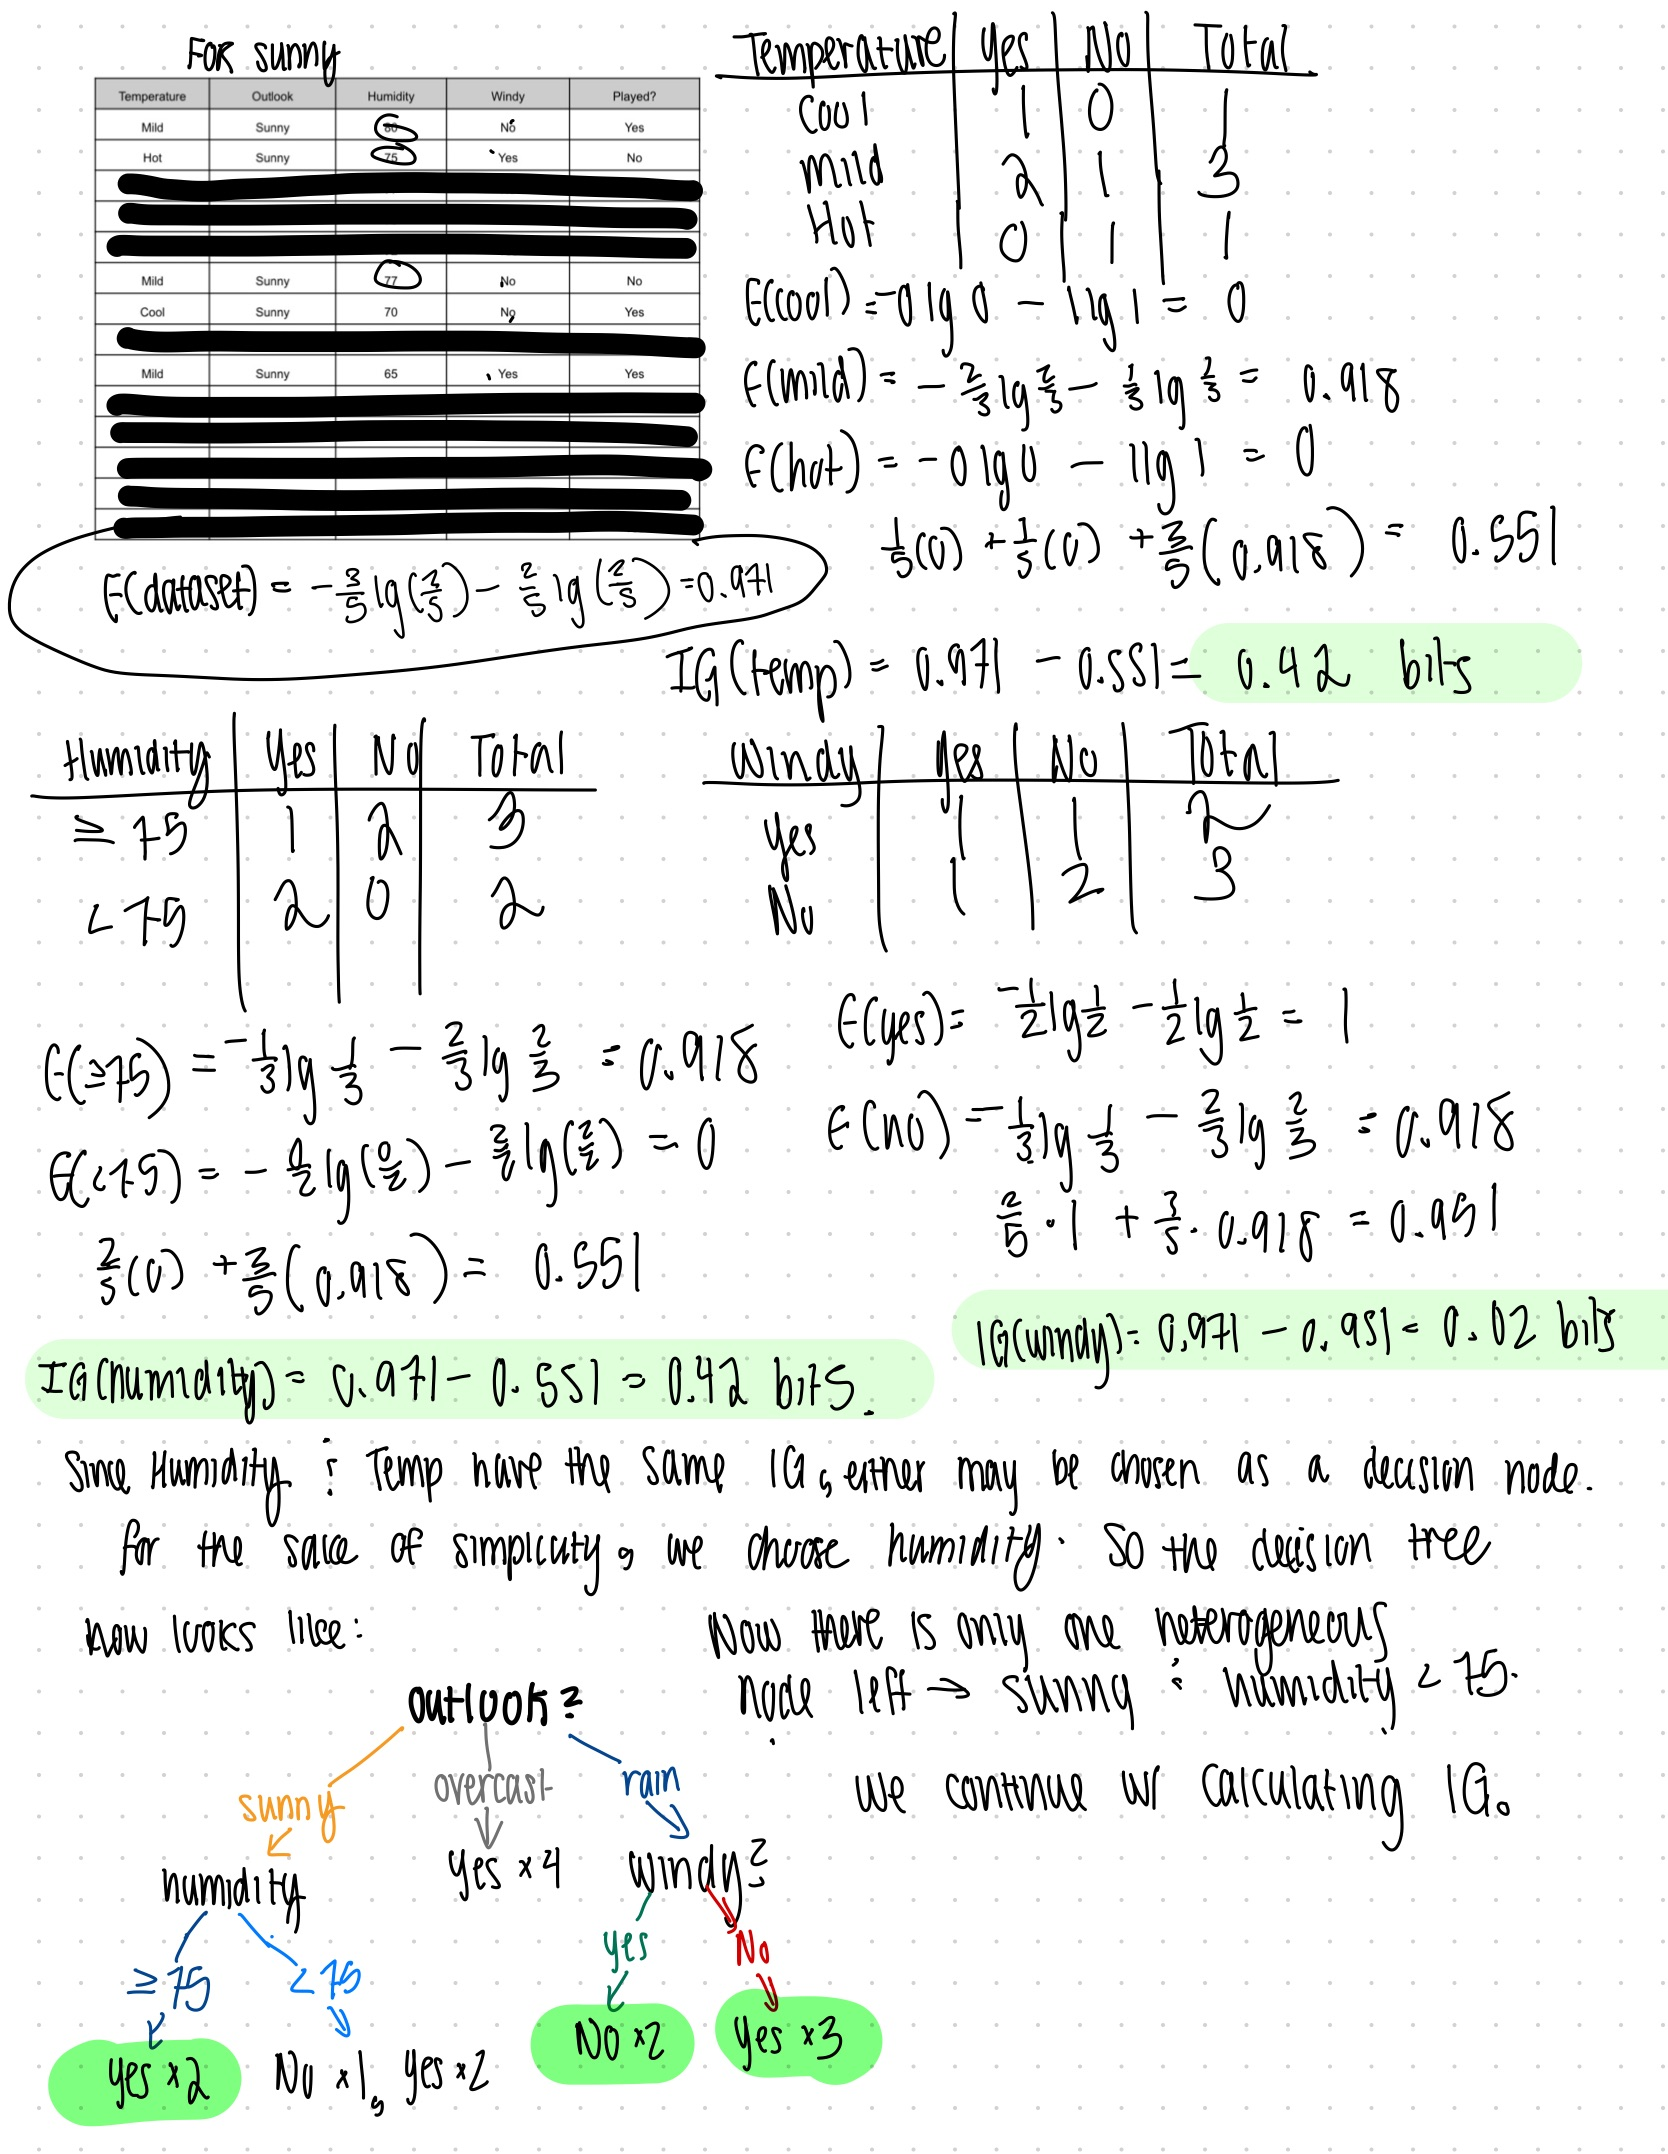
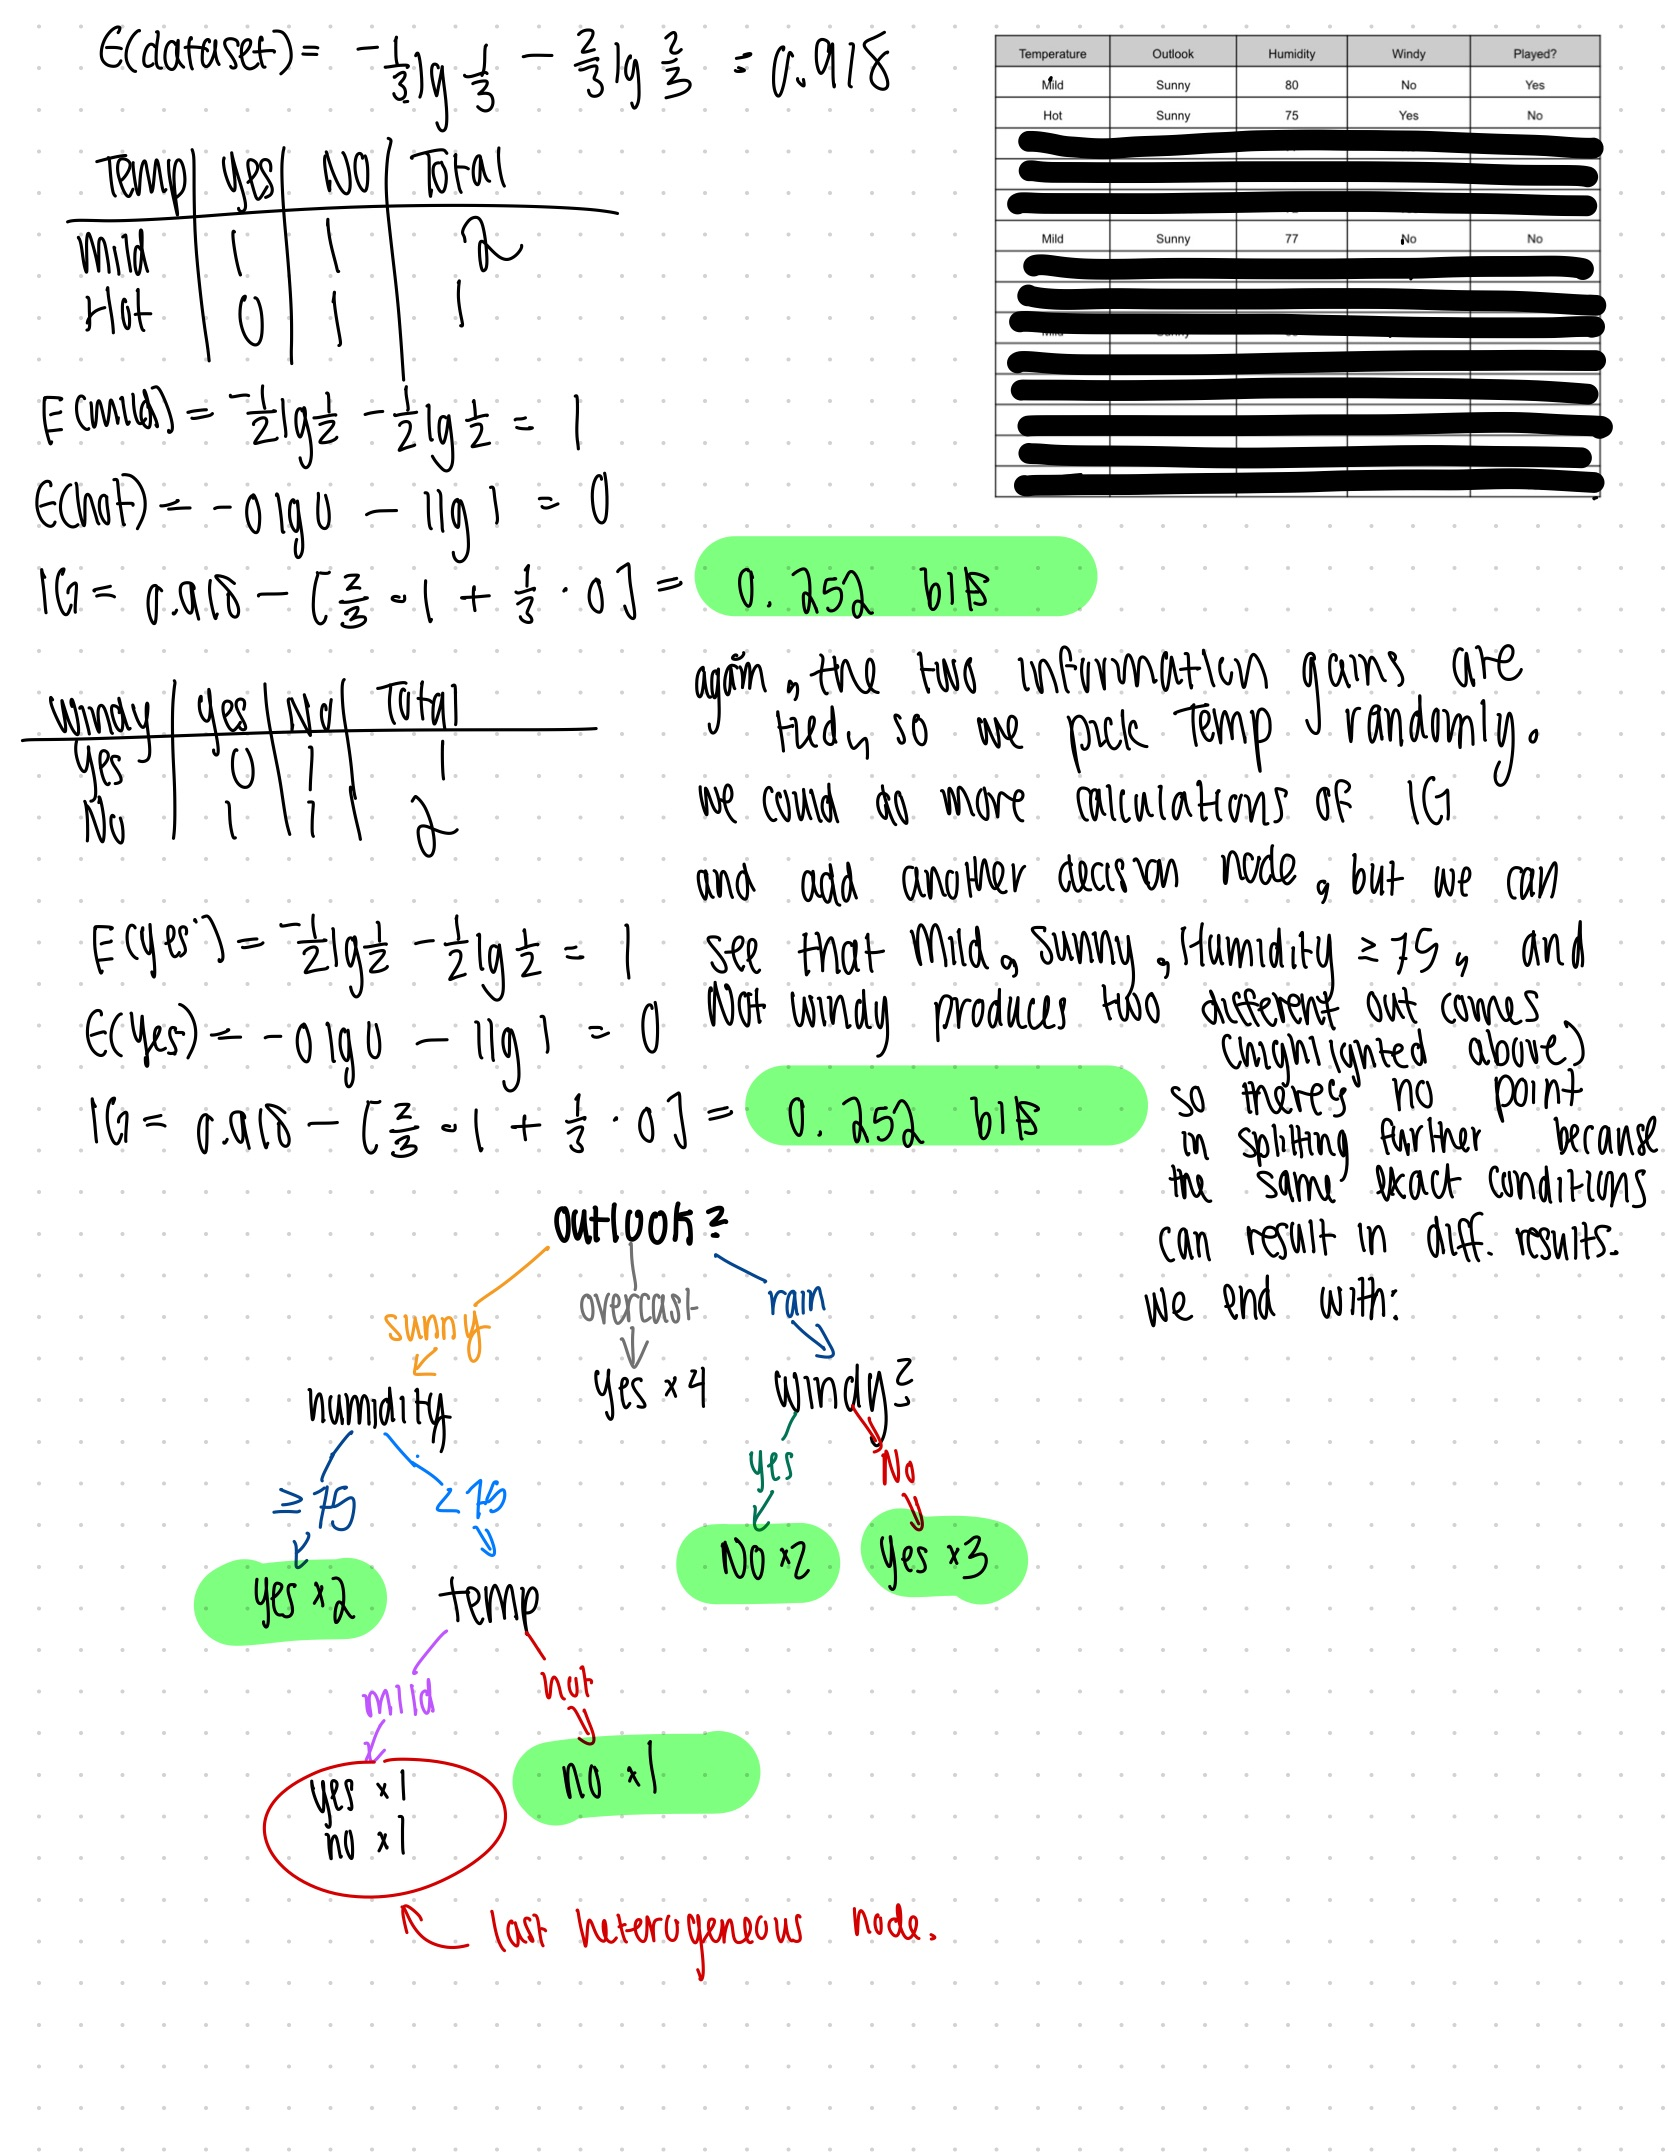


 (10 points) Provide a visualization of the entire tree. At last, extract 4 decision rules and provide them in your answer.
--- 

The final tree visualization is provided above. 
Here are 4 decision rules:
1. if Outlook = Overcast, then Played= Yes
2. if Outlook = Rain and Windy = No, then Played = Yes
3. if Outlook = Rain and Windy = Yes, then Played = No
4. if Outlook = Sunny and Humidity >= 75, then Played = Yes

Q3- (10 points) What are the differences between Agglomerative Clustering and K-Means Clustering? Fully explain in details in terms of the methodology used. 
---

https://medium.com/@namanbhandari/agglomerative-clustering-vs-k-means-clustering-766a90b37dc0

The main difference between Agglomerative Clustering and K-Means Clustering is that Agglomerative Clustering is hierarchical -- i.e. it forms a tree-like structure of classifications, finding points of data that are close together and successively grouping them together. The main hyperparamter is n_clusters, i.e. how many clusters we want remaining as we successively merge data.It's useful when decisions on how coarsely/finely we wnat data grouped need to be made. 

Meanwhile, k-means clustering in *simultaneous*, meaning data is "comparable" -- there's no subsets, only distinct main hierarchies which items fall into. The probability of a data point belonging to a cluster is 0 or 1. Data points are iteratively assigned to the nearest cluster center (centroid - the multi-densional average/center point of a cluster), then centroids are recalculated based on the new assignment. The algorithm stops when the centroids no longer move or a maximum number of iterations is reached. Ineratia (intra-cluster sum-of-squares, "internal coherence") and distortion, the average of squared errors from each point to the closest centroid, are scoring parameters to determine number of clusters.


Q4- (10 points) Explain how the number of clusters can be determined in K-means clustering? Fully explain the methodology. 
---

In class, we went over the "elbow method" and the "silhouette" methods to determine the number of clusters in K-means clustering.

The elbow method have you pick "K", the number of clusters, by finding the "elbow" in the plot of number of clusters (K) versus the total variation between cluster members and their centers. We want the point at which there is a huge reduction in variation, but with increasing *k* after that, the variation doesn't go down as quickly. In other words, the optimal number of clusters is the point after which the distortion/inertia starts decreasing in a linear fashion as the number of clusters grow. 

Another method is the silhouette score S, a measure of how similar a data point is to its own cluster as compared to other clusters. A silhouette coefficient is calculated for each datapoint
It involves cluster cohesion (mean intra-cluster distance = a), the mean distance between data point i and all other data points in the same cluster, and cluster separation (mean nearest-cluster distance = b) -- the mean distnce between teh data point and all other data points in nearest clusters the sample is not a part of (the minimum other-cluster distance average is chosen). 
They are put together as follows:

$$
S = \frac{b - a}{max (b, a)}
$$

And this silhouette score will range between -1 and 1~ the higher the score, the better the clustering algorithm. We want to find the maximum silhouette value out of all possible *k* cluster values to get the optimal number of clusters.

Q5- (20 points) You are given a dataset: vehicles.csv. 
---

Dataset Columns:
VehicleID: Unique identifier for each vehicle.

EngineSize: Engine size in liters.

Horsepower: Horsepower of the vehicle.

Weight: Weight of the vehicle in pounds.

MPG_City: Miles per gallon in city driving.

MPG_Highway: Miles per gallon on the highway.

Price: Price of the vehicle in dollars.

You are provided with the implementation and results of performing k-means clustering on the vehicles dataset (see below). Based on all the provided results and code, answer the following questions: 
---

(5 points) Determine the best number of clusters (i.e., k) by checking the results of elbow method. Explain why you think this is the best number of clusters. Put the correct number of Optimal number of clusters in the code and re-run the code to provide cluster visualization.
---

The optimal number of clusters eseems to be 2-- since after that k-value, the variation doesn't go down as quickly (decreases in a linear fashion as the number of clusters grows)

(3 points) What does the computed Silhouette score determine?
---

(12 points) Fully discuss the results and what they imply about the different groups 
vehicles.  Remember, the best number of clusters should provide meaningful clusters.
---

In the code below, we import the dataset vehicles.csv into a Pandas DataFrame. We drop the VehicleID column as it is not a relevant feature for clustering. Then we standardize the features to have zero mean and unit variance.

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('vehicles.csv')

# Drop the VehicleID column
df = df.drop('VehicleID', axis=1)

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df)


Here, we use the Elbow Method to determine the optimal number of clusters (k). We plot the results.

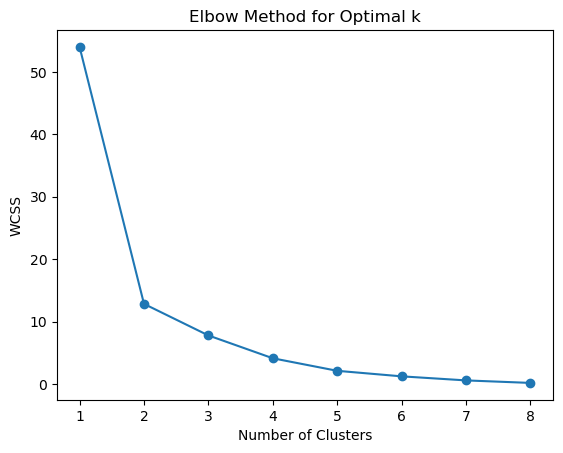

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 10)
    kmeans.fit(standardized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure()
plt.plot(range(1, 9), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Here, we calculate the silhouette score.

In [15]:
# Optimal number of clusters 
optimal_clusters = 2

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init = 10)
cluster_labels = kmeans.fit_predict(standardized_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels


In [16]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(standardized_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Discuss the results

Silhouette Score: 0.5810452344180216


The Silhouette Score is higher than it was for the previous silhouette score for 4 clusters (0.365 as compared to 0.581). This higher Silhouette Score means that data points, on average, is farther away from neighboring clusters -- indicating a better clustering algorithm. It measure cluster cohesion (mean distance between data point and other data points in its cluster) and cluster separation (mean distance between data point and all other data points in the nearest clusters the sample is not a part of). 

         EngineSize  Horsepower  Weight  MPG_City  MPG_Highway    Price
Cluster                                                                
0             3.325       262.5  3625.0      17.5         24.5  30000.0
1             2.020       150.0  3000.0      24.6         31.2  20000.0


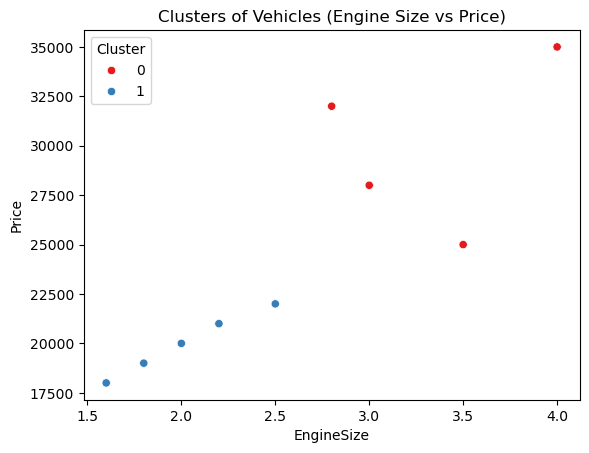

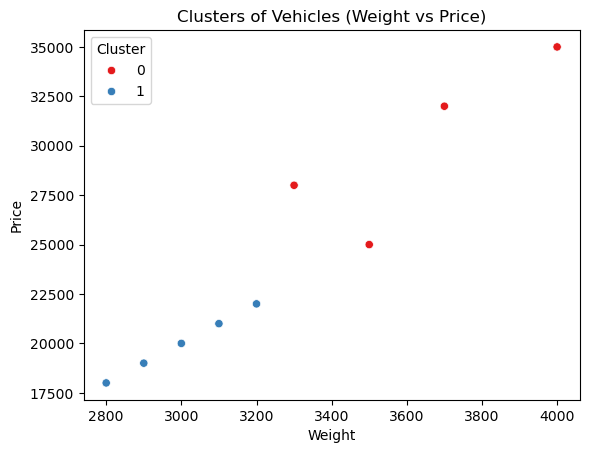

In [18]:
# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters
import seaborn as sns

# Scatter plot of EngineSize vs Price, color-coded by cluster
plt.figure()
sns.scatterplot(x='EngineSize', y='Price', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Vehicles (Engine Size vs Price)')
plt.show()

# Scatter plot of EngineSize vs Price, color-coded by cluster
plt.figure()
sns.scatterplot(x='Weight', y='Price', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Vehicles (Weight vs Price)')
plt.show()

With the true optimal number of clusters, 2, we see two main meaningful clusters emerge: one of higher-priced vehicles with larger engines, and one of lower-priced vehicles with smaller engines. This would seem to be the difference between heavier-duty and more powerful vehicles and regular vehicles, like sedans. The priority for utility vehicles is towing ability and power, so those cares prioritize horsepower over gas mileage, creating a cluster. Furthermore, those cars are likely to be heavier to account for the larger engines needed for the power, and also cost more due to their enhanced features. Lower-end common household vehicles, like sedans, on the other hand, are lighter, cheaper, more fuel-efficient for daily commuting needs, and have smaller engines/lower horsepower to save gas and serve the sole purpose of getting from point A to point B.

Q6- Explain how eigen values and eigen vectors are computed in Principal Component Analysis. Next, create a numerical example and provide your computations for eigen vectors and eigen values based on the lecture. In your example, assume that there are only 3 input features and 10 observations in your dataset. 
---

Principal components are obtained by computing an eigenvalue and an eigenvector -- the eigenvalue indicating the direction of the principal component in the transformed feature space, and the eigenvalue gives the magnitude of the variance in the direction of an eigenvector.

To compute the eigenvalues and eigenvectors, do the following:
1. Use Z-score (z = ($x_i$ - μ) / σ) to standardize the
dataset. The standardized data will have μ=0 , σ=1.
2. Compute either covariance matrix ∑ or correlation
matrix to understand the relationships between the
variables.
3. Use the covariance matrix ∑ to compute
eigenvalues (𝜆 " ) and eigenvectors (𝑒" )
4. To obtain the principal components, pick the top x
eigenvectors corresponding to the largest
eigenvalues sorted in descending order.
5. Re-orient (transform) the original data into the new
coordinate system defined by the selected principal
components (project the data into eigenvectors).
6. Use the transformed data for training/testing the
model.
Eigenvalues determine the importance of
eigenvectors (i.e., components) and indicate
variance in data(spread).
The direction of the principal components is
on the larger spread of the data.

   • Maximize variance


   • Project to the line that minimizes variance or
    Squared Sum of deviations from the mean






__Assume features 1:x, 2:y, and 3:z__


| x | y | z |
|:-:|:-:|:-:|
| 5 | 2 | 3 |
| 1 | 4 | 6 |
| 2 | 6 | 9 |
| 3 | 8 | 12|
| 4 | 0 | 0 |
| 5 | 12| 18|
| 6 | 14| 21|
| 7 | 16| 24|
| 8 | 18| 27|
| 9 | 20| 30|

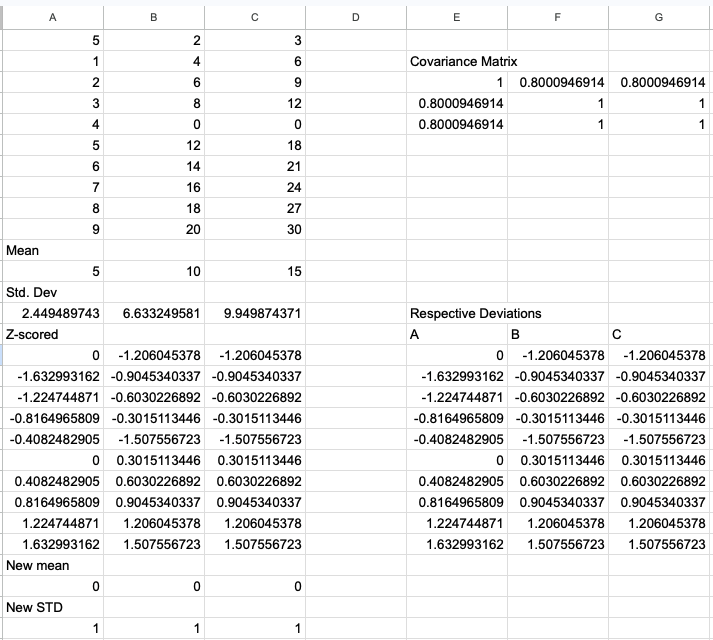
[https://docs.google.com/spreadsheets/d/1OciLQuhBju2efnpJOaJwfldOqugkcEFO2vzgSZ3HU2Y/edit?usp=sharing]


The covariance matrix:
$$
\Sigma =
\begin{bmatrix}
1 & 0.8001 & 0.8001 \\
0.8001 & 1 & 1 \\
0.8001 & 1 & 1
\end{bmatrix}
$$

Solving for eigenvalues, the roots of the equation:
$$
\det(\Sigma - \lambda I) = 0
$$
Where $I$ is the $3 \times 3$ identity matrix:
$$
I =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Substitute $\lambda$ into the matrix:
$$
\Sigma - \lambda I =
\begin{bmatrix}
1-\lambda & 0.8001 & 0.8001 \\
0.8001 & 1-\lambda & 1 \\
0.8001 & 1 & 1-\lambda
\end{bmatrix}
$$

The determinant of a $3 \times 3$ matrix is given by:
$$
\det(A) = a(ei − fh) − b(di − fg) + c(dh − eg)
$$

$$
\det(\Sigma - \lambda I) = 
(1-\lambda)[(1-\lambda)(1-\lambda) - (1)(1)] - (0.8001)[(0.8001)(1-\lambda) - (1)(0.8001)] + (0.8001)[(0.8001)(1) - (0.8001)(1)]
$$

which results in the cubic equation $\lambda*(-\lambda^2 + 3*\lambda - 0.71967998)$

Solving it yields three eigenvalues:
$$
\lambda_1 = 2.7371, \quad \lambda_2 = 0.2629, \quad \lambda_3 = 0
$$


To calculate the eigenvectors for the eigenvalues, solve:
$$
(\Sigma - \lambda I)v = 0
$$
This is done by row reducing the augmented matrix $(\Sigma - \lambda I | 0)$ to its reduced row echelon form (RREF).


#### Eigenvalue $\lambda_1 = 2.7371$

$$
\Sigma - \lambda_1 I =
\begin{bmatrix}
1 - 2.7371 & 0.8001 & 0.8001 \\
0.8001 & 1 - 2.7371 & 1 \\
0.8001 & 1 & 1 - 2.7371
\end{bmatrix}
=
\begin{bmatrix}
-1.7371 & 0.8001 & 0.8001 \\
0.8001 & -1.7371 & 1 \\
0.8001 & 1 & -1.7371
\end{bmatrix}
$$

$$
\begin{bmatrix}
-1.7371 & 0.8001 & 0.8001 & 0 \\
0.8001 & -1.7371 & 1 & 0 \\
0.8001 & 1 & -1.7371 & 0
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & -0.4605 & -0.4605 & 0 \\
0 & 1 & -0.7427 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

$$
\begin{aligned}
v_1 - 0.4605v_2 - 0.4605v_3 &= 0 \\
v_2 - 0.7427v_3 &= 0 \\
v_3 &= 0
\end{aligned}
$$

Solve to get:
$$
v_3 = 0 \quad \Rightarrow \quad v_2 = 0 \quad \Rightarrow \quad v_1 = 0
$$

$$
v_1 = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}
$$


Eigenvalue $\lambda_2 = 0.2629$

$$
\Sigma - \lambda_2 I =
\begin{bmatrix}
1 - 0.2629 & 0.8001 & 0.8001 \\
0.8001 & 1 - 0.2629 & 1 \\
0.8001 & 1 & 1 - 0.2629
\end{bmatrix}
=
\begin{bmatrix}
0.7371 & 0.8001 & 0.8001 \\
0.8001 & 0.7371 & 1 \\
0.8001 & 1 & 0.7371
\end{bmatrix}
$$

$$
\begin{bmatrix}
0.7371 & 0.8001 & 0.8001 & 0 \\
0.8001 & 0.7371 & 1 & 0 \\
0.8001 & 1 & 0.7371 & 0
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & -0.5281 & -0.5281 & 0 \\
0 & 1 & -0.7427 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

$$
\begin{aligned}
v_1 - 0.5281v_2 - 0.5281v_3 &= 0 \\
v_2 - 0.7427v_3 &= 0 \\
v_3 &= 0
\end{aligned}
$$

$$
v_3 = 0 \quad \Rightarrow \quad v_2 = 0 \quad \Rightarrow \quad v_1 = 0
$$

$$
v_2 = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}
$$


 Eigenvalue $\lambda_3 = 0$

$$
\Sigma - \lambda_3 I =
\begin{bmatrix}
1 & 0.8001 & 0.8001 \\
0.8001 & 1 & 1 \\
0.8001 & 1 & 1
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 0.8001 & 0.8001 & 0 \\
0.8001 & 1 & 1 & 0 \\
0.8001 & 1 & 1 & 0
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 0.8001 & 0.8001 & 0 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

$$
\begin{aligned}
v_1 + 0.8001v_2 + 0.8001v_3 &= 0 \\
v_2 + v_3 &= 0
\end{aligned}
$$

- From $v_2 + v_3 = 0$: $v_2 = -v_3$.
- Substitute into $v_1 + 0.8001v_2 + 0.8001v_3 = 0$:
  $$
  v_1 + 0.8001(-v_3) + 0.8001v_3 = 0
  $$
  $$
  v_1 = 0
  $$

Result:
$$
v_3 = \begin{bmatrix} 0 \\ -1 \\ 1 \end{bmatrix}
$$


- $\lambda_1 = 2.7371$: No non-trivial eigenvector.
- $\lambda_2 = 0.2629$: No non-trivial eigenvector.
- $\lambda_3 = 0$: Eigenvector:
  $$
  v_3 = \begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}
  $$



Q7- (15 points) Consider the table of measured data given below
---

![Generated Dataset](pic1.png)

The goal is to build a decision tree model to predict the outcome y using the two features $x_1$,$x_2$, where each feature $x_1$,$x_2$ can take one of the three values: a, b, c. 

hint: 
- $log_2 (0.4) = -1.32 $                   
- $log_2 (0.6) = -0.73 $
- $log_2 (0.5) = -1 $                        
- $log_2 (0.75) = -0.41 $
- $log_2 (0.25) = -2 $

![Generated Dataset](cont.jpg)

Answer the Following Questions:
---
- __Compute the entropy of the target variable y (round to 3 decimal places). Include all your assumptions. Entropy(y) = ?__
- Total y's: 10 | 1's: 6 | 0's: 4
  $$
  Entropy(y) = -\frac{6}{10}log_2(\frac{6}{10}) - \frac{4}{10}log_2(\frac{4}{10}) = -(0.6*-0.73) - (0.4*-1.32) = 0.966
  $$
- __Compute the information gain for $x_1$ and $x_2$ attributes and show your work. Based on the computed values, indicate which attribute ($x_1$ or $x_2$) should be selected first in the split strategy during model construction. Show your computation and use the provided contingency table below, which is obtained from the information in the dataset in the table above.__
- 
$$
    IG(x_1) = E(dataset) - (weightedavg*E(a) + weightedavg*E(b) + weightedavg*E(c))
$$
$E(a) = -\frac{2}{4}log_2(\frac{2}{4}) - \frac{2}{4}log_2(\frac{2}{4}) = 1$
$E(b) = -\frac{0}{2}log_2(\frac{0}{2}) - \frac{2}{2}log_2(\frac{2}{2}) = 0$
$E(c) = -\frac{2}{4}log_2(\frac{2}{4}) - \frac{2}{4}log_2(\frac{2}{4}) = 1$

$$
    IG(x_1) = 0.966 - (\frac{4}{10} * 1 + \frac{2}{10} * 0 + \frac{4}{10} * 1) = 0.166
$$

$$
    IG(x_2) = E(dataset) - (weightedavg*E(a) + weightedavg*E(b) + weightedavg*E(c))
$$
$E(a) = -\frac{1}{4}log_2(\frac{1}{4}) - \frac{3}{4}log_2(\frac{3}{4}) = 0.811$
$E(b) =  - \frac{2}{2}log_2(\frac{2}{2}) - \frac{0}{2}log_2(\frac{0}{2}) = 0$
$E(c) = -\frac{1}{4}log_2(\frac{1}{4}) - \frac{3}{4}log_2(\frac{3}{4}) = 0.811$

$$
    IG(x_2) = 0.966 - (\frac{4}{10} * 0.811 + \frac{2}{10} * 0 + \frac{4}{10} * 0.811) = 0.317
$$

Since $x_2$ has the highest information gain, $x_2$ should be selected first in the split strategy during model cosntruction.

Q8- (5 points) Explain how Random Forest algorithm controls the number of features to find the best split? 
---

Random forest has a hyperparameter that controls the number of features to try when making a new decision node, injecting randomness (i.e. try a random subset of features with size given by $\frac{n features}{3}$ or $\sqrt{n features}$). This reduces correlation between individual subtrees while at the same time increasing diversity and thus accuracy. Each tree is thus more unique, thus preventing overfitting.